In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from utils import path_config as config

In [2]:
def compute_anisotropy(X):
    X_centered = X - np.mean(X, axis=0)
    _, singular_values, _ = np.linalg.svd(X_centered)
    squared_singular_values = singular_values ** 2
    anisotropy_score = squared_singular_values[0] / np.sum(squared_singular_values)  
    return anisotropy_score

In [3]:
for model_name in ['en_bert', 'en_multi_bert', 'en_gpt',  'ru_bert', 'ru_multi_bert', 'ru_gpt']:
    data = torch.load(config[model_name])
    X = np.array(data['mean_embeddings'])
    anisotropy_score = compute_anisotropy(X)
    print(f"{model_name}: anisotropy score =", round(anisotropy_score, 4))

en_bert: anisotropy score = 0.117
en_multi_bert: anisotropy score = 0.0911
en_gpt: anisotropy score = 0.7082
ru_bert: anisotropy score = 0.1538
ru_multi_bert: anisotropy score = 0.0901
ru_gpt: anisotropy score = 0.277


In [4]:
def plot_embeddings(X, model_name): # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    print('explained_variance_ratio =', explained_variance_ratio)
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    print('cumulative_explained_variance =', cumulative_explained_variance)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
    plt.title(f'2D PCA of {model_name} embeddings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

def visualize_tsne(X, model_name): 
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], s=15, alpha=0.5)
    ax.set_title(f"3D t-SNE visualization of {model_name} embeddings")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_zlabel("Dimension 3", labelpad=15) 
    plt.show()

explained_variance_ratio = [0.11699854 0.09518295]
cumulative_explained_variance = [0.11699854 0.21218148]


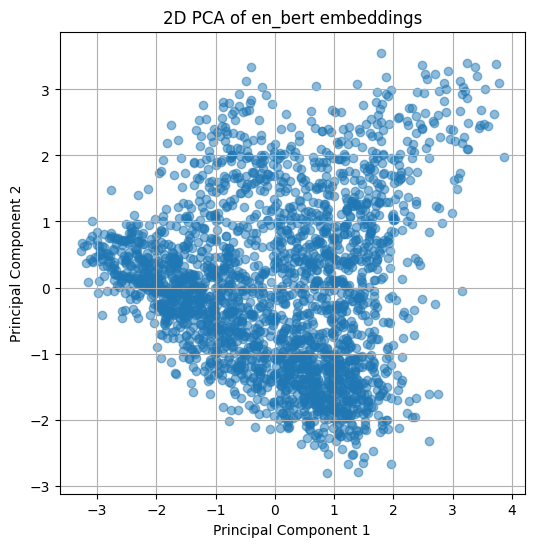

In [5]:
model_name = 'en_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

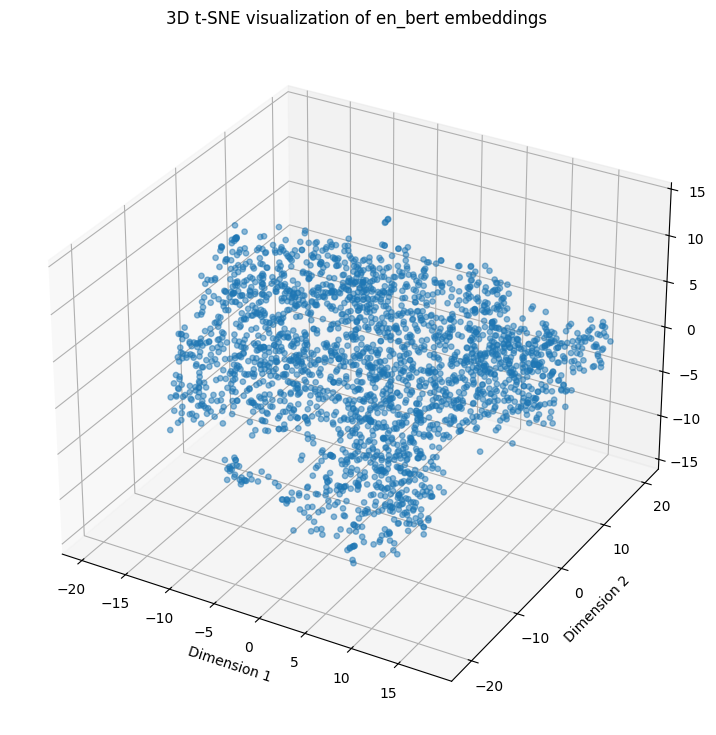

In [6]:
model_name = 'en_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)

explained_variance_ratio = [0.09108363 0.07513423]
cumulative_explained_variance = [0.09108363 0.16621786]


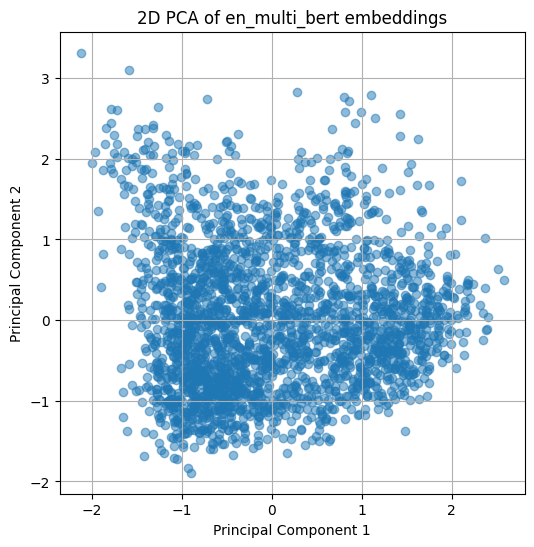

In [7]:
model_name = 'en_multi_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

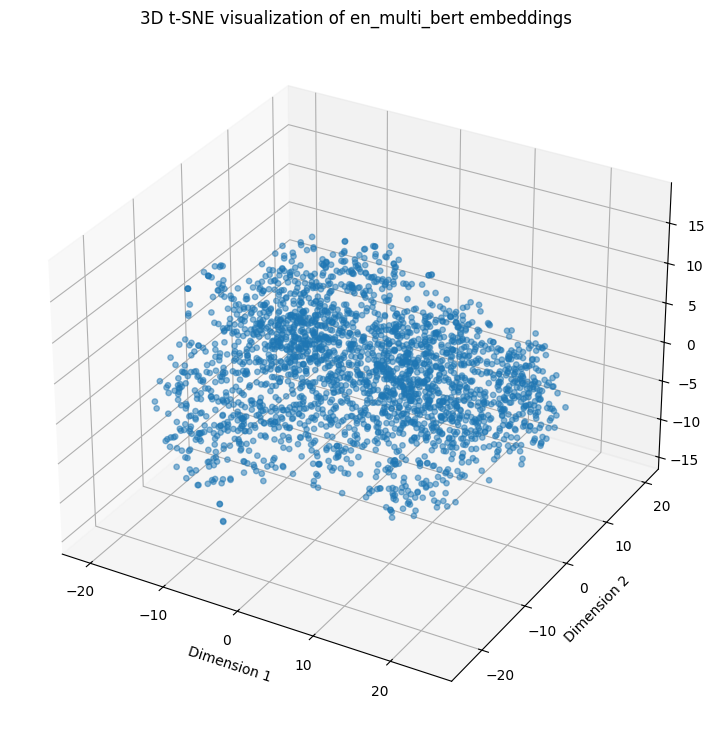

In [8]:
model_name = 'en_multi_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)

explained_variance_ratio = [0.15377355 0.07876033]
cumulative_explained_variance = [0.15377355 0.23253387]


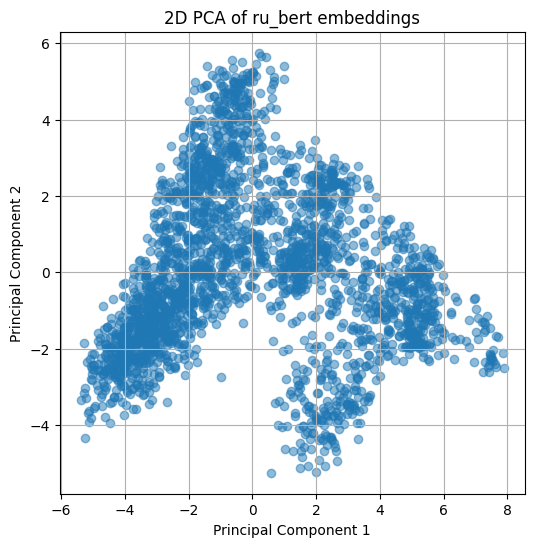

In [9]:
model_name = 'ru_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

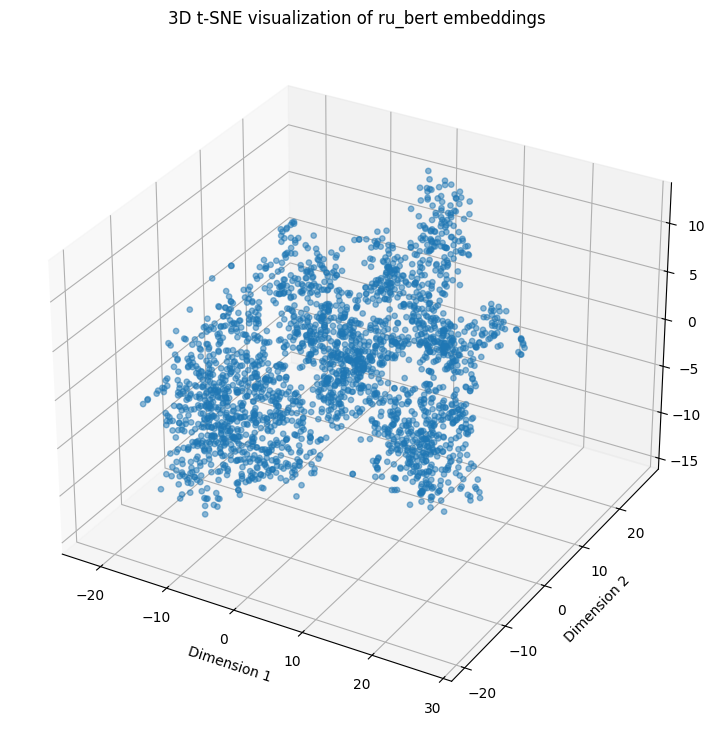

In [10]:
model_name = 'ru_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)

explained_variance_ratio = [0.09014281 0.06878512]
cumulative_explained_variance = [0.09014281 0.15892792]


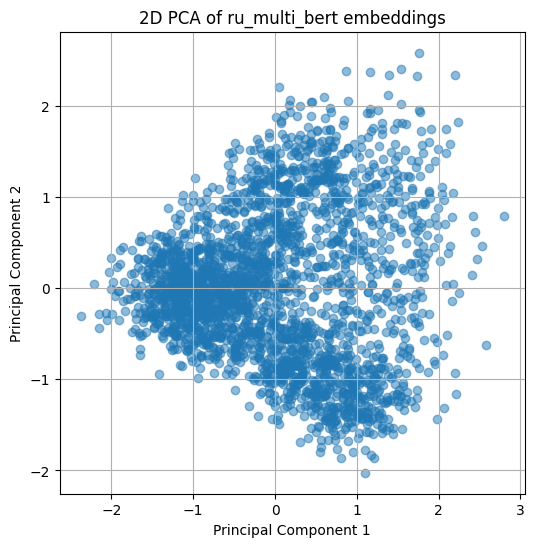

In [11]:
model_name = 'ru_multi_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

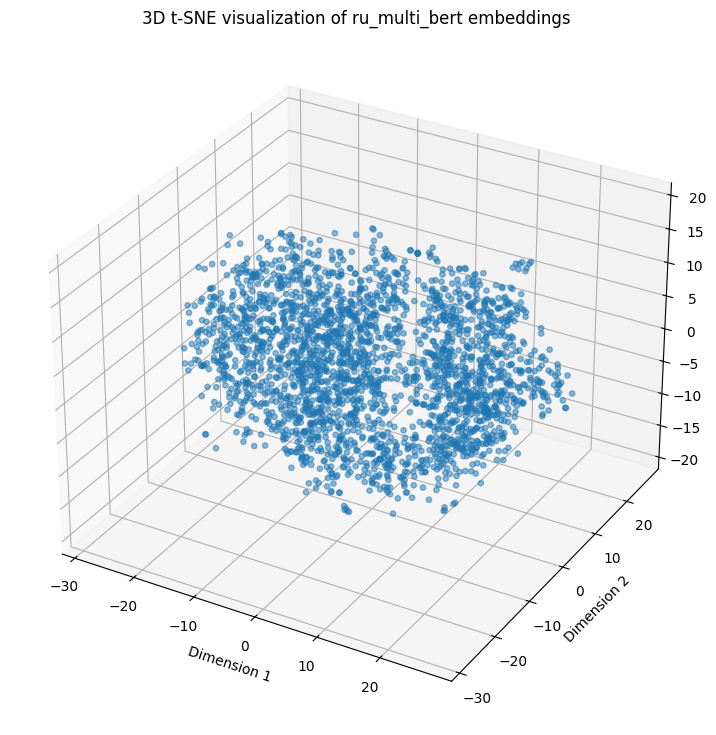

In [12]:
model_name = 'ru_multi_bert'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)

explained_variance_ratio = [0.7081987  0.08901316]
cumulative_explained_variance = [0.7081987 0.7972119]


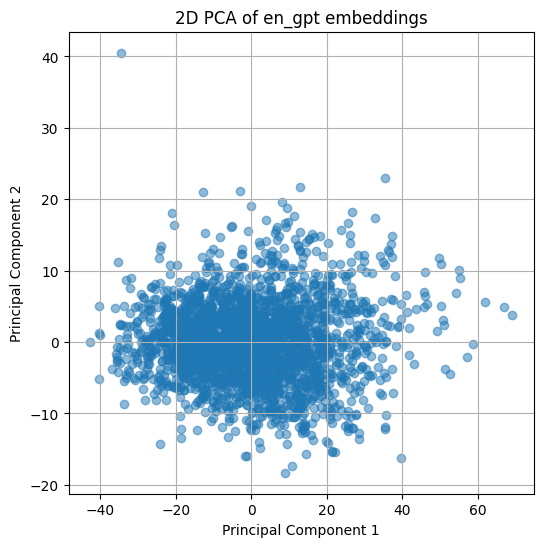

In [13]:
model_name = 'en_gpt'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

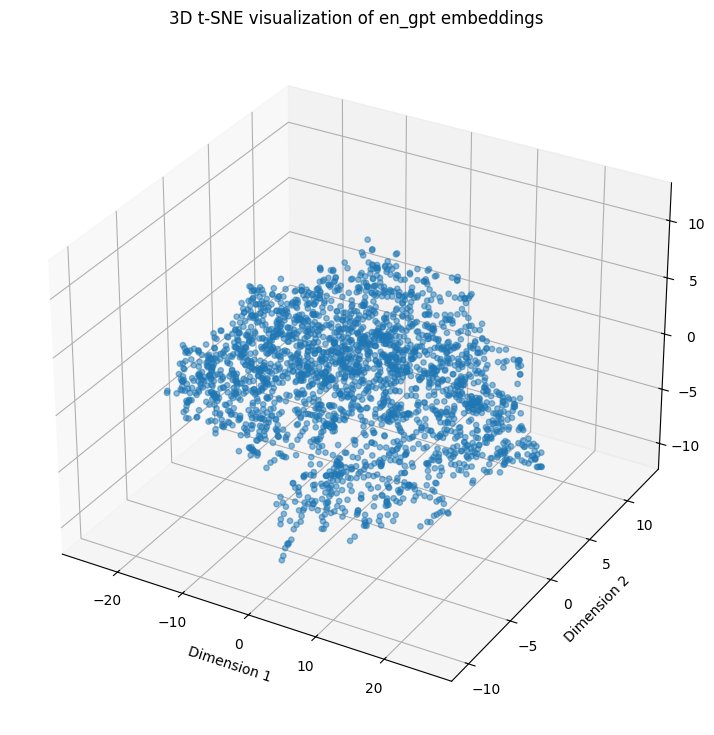

In [14]:
model_name = 'en_gpt'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)

explained_variance_ratio = [0.27704856 0.09885074]
cumulative_explained_variance = [0.27704856 0.3758993 ]


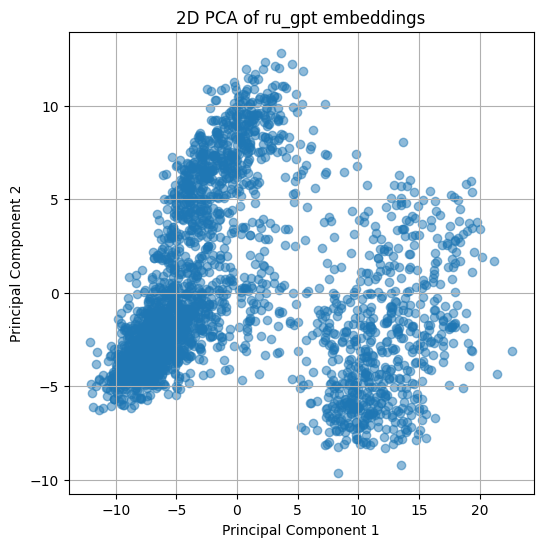

In [15]:
model_name = 'ru_gpt'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
plot_embeddings(X, model_name)

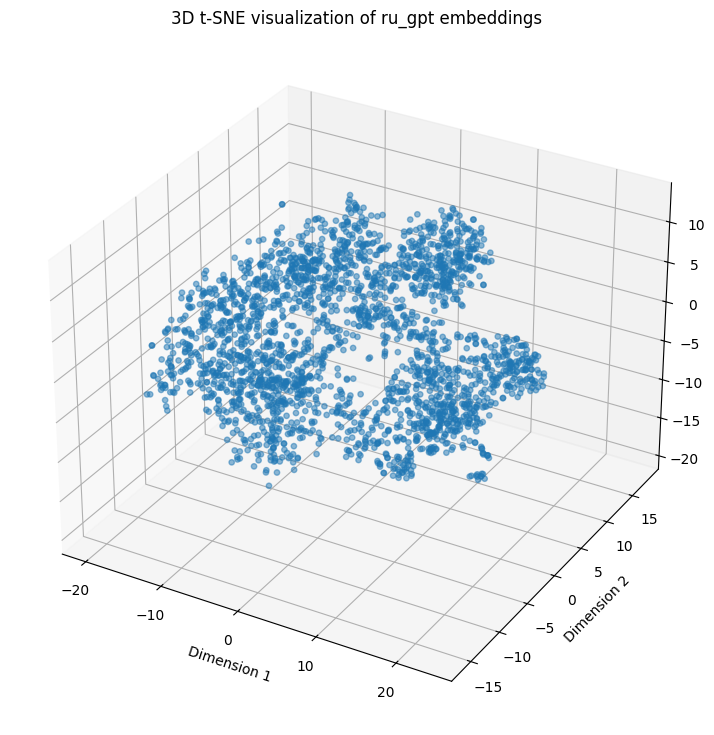

In [16]:
model_name = 'ru_gpt'
data = torch.load(config[model_name])
X = np.array(data['mean_embeddings'])
visualize_tsne(X, model_name)